# **Laboratorijska vježba 8**: Nenadzirano strojno učenje

> Analiza podataka četvrti je korak u uobičajenom slijedu koraka koje provodi podatkovni znanstvenik. Ova faza je ključna faza u znanosti o podacima, a uključuje izvođenje različitih tehnika za analizu podataka. U sklopu ovog koraka provodi se eksploratorna/potvrdna, prediktivna, regresijska ili kvalitativna analiza. 

> U ovoj laboratorijskoj vježbi upoznat ćemo se s jednim aspektom analize podataka koji se naziva prediktivna analiza. U sklopu ove analize uobičajeno se primjenjuju algoritmi strojnog učenja. U ovoj laboratorijskoj vježbi proučit ćemo algoritme **nenadziranog** strojnog učenja. U tu svrhu koristit ćemo biblioteku scikit-learn. 
---

# **Nenadzirano strojno učenje**

Strojno učenje bavi se proučavanjem i oblikovanjem računalnih algoritama koji grade modele problema iz različitih domena na temelju empirijskih podataka. Ti se modeli koriste za obavljanje raznih zadataka, kao što su predviđanje, donošenje odluka te raspoznavanje uzoraka. Osnovni pristupi strojnom učenju jesu **nadzirano** i **nenadzirano učenje**. Kod nenadziranog strojnog učenja, skup podataka **ne sadrži** oznake primjeraka. Ipak, cilj algoritama nenadziranog strojnog učenja jest dodijeliti oznake primjercima. Ako su takve oznake diskretne, riječ je o problemu **grupiranja**. Ako su novododane oznake kontinuirane, riječ je o problemu **smanjenja dimenzionalnosti**.

# **Grupiranje**

Problem grupiranja može se definirati na sljedeći način. Za zadani skup točaka, poznavajući udaljenost između točaka, potrebno je grupirati točke u neki broj grupa, tako da:

* su članovi grupe bliski (slični) jedan drugome
* su članovi različitih grupa udaljeni (različiti) jedni od drugih.

Točke obično predstavljaju primjerke iz višedimenzionalnog skupa podataka, a udaljenost se može izračunati nekom od poznatih mjera udaljenosti (primjerice, Euklidska, Jaccard, kosinusna,...).

## **Poznatiji problemi grupiranja**

Algoritmi grupiranja podataka primjenjuju se u različite svrhe. Neke od najpoznatijih jesu:

* eksplorativna analiza podataka
* particioniranje podataka za finiju analizu
* grupiranje ciljnih skupina u marketinškoj analizi
* grupiranje nebeskih tijela
* grupiranje filmova u kategorije
* grupiranje tekstualnih dokumenata
* podržavanje oznaka u nadziranom strojnom učenju
* podržavanje diskretizacije značajki za nadzirano strojno učenje
* kompresija podataka



## **Algoritmi za grupiranje podataka**

Algoritmi za grupiranje podataka mogu se kategorizirati na različite načine. Ovisno o tome postoji li hijerarhija između grupa podataka, razlikujemo **hijerarhijsko** i **ravno** (engl. *flat*) grupiranje. Kod prvog, grupe formiraju hijerarhiju u obliku stabla, dok kod drugog ne postoji interna struktura između grupa nego se svaki primjerak zasebno pridjeljuje grupi. Hijerarhijsko grupiranje može se provesti na dva različita načina - tako da svaki primjerak inicijalno predstavlja grupu te se grupe rekurzivno spajaju; ili da inicijalno postoji jedna grupa koja se rekurzivno razdvaja na manje grupe. S druge strane, predstavnik algoritama ravnog grupiranja jest **algoritam** **$k$-means**. 

Nadalje, ovisno o načinu dodjele primjerka grupi razlikujemo **čvrsto** (engl. *hard*) te **meko** (engl. *soft*) grupiranje. Kod čvrstog grupiranja primjerci su jednoznačno dodijeljeni nekoj grupi. S druge strane, kod mekog grupiranja primjercima se pridružuje vjerojatnost pripadanja svakoj pojedinoj grupi. 

### **Algoritam $k$-means**

Algoritam $k$-means jedan je od najpoznatijih algoritama za grupiranje. Cilj algoritma je dodijeliti svaki primjerak jednom od $k$ grupa tako da je ukupna udaljenost primjeraka od središta grupe minimalna. Ovaj način grupiranja riješen je jednostavnim pohlepnim algoritmom (Lloydovim algoritmom) koji lokalno minimizira udaljenost (uobičajeno Euklidsku udaljenost) primjeraka u grupi do središta grupe. Algoritam se provodi u dva koraka koji se opetovano ponavljaju:

1.  Za svaki primjerak pronađi najbliže središte od svih $k$ središta te ga dodijeli grupi koja ima to središte.
2.  Ponovno izračunaj središte svake grupe kao aritmetičku sredinu svih točaka u grupi. 

Ovi koraci se ponavljaju određen (unaprijed zadan) broj iteracija ili sve dok promjene u središtima ne postanu neznatne. Algoritam $k$-means iznimno je osjetljiv na inicijalne postavke središta. Oni se inicijalno mogu postaviti na nasumično odabrane primjerke u skupu podataka ili pak pomoću neke "pametnije" heuristike. 


#### **Provjera grupa**

Nadalje, dodatna poteškoća pri korištenju algoritma $k$-means jest potreba za definiranjem broja grupa $k$ unaprijed. Odabir optimalnog broja grupa dio je većeg problema koji se naziva **provjera grupa** (engl. *cluster validation*): koliko je dobro naše grupiranje? Odabir grupa jedan je od glavnih problema kod grupiranja. Idealno, broj grupa odgovarat će broju "prirodnih grupa" u skupu podataka, no taj nam je broj najčešće nepoznat. Pitanje je onda kako odrediti optimalan broj grupa $k$, kad ne znamo unaprijed koliko grupa postoji u podacima. 

Problem odabira broja grupa zapravo je analogan odabiru složenosti modela kod nadziranog strojnog učenja - grupiranje s velikim brojem grupa odgovara složenom modelu. Znamo da općenito u strojnom učenju najsloženiji model daje najmanju grešku nad podacima za treniranje. Kod grupiranja to znači da će podaci biti savršeno grupirani ako svaki primjerak predstavlja grupu za sebe. No, takvo grupiranje nema praktičnu vrijednost. 


##### **Metoda lakta**

Jedna od najpoznatijih tehnika provjere grupa jest metoda lakta (engl. *elbow method*). Zasniva se na grafičkom prikazivanju ovisnosti neke kriterijske funkcije o parametru $k$ te se traži "lakat" ili "koljeno" takve krivulje, odnosno mjesto gdje funkcija naglo pada te zatim stagnira ili pada vrlo sporo. S porastom broja grupa $k$, vrijednost kriterijske funkcije će padati, no taj pad općenito neće biti ujednačen. Ako s povećanjem broja grupa kriterijska funkcija brzo opadne i onda neko vrijeme stagnira, to je signal da smo upravo "uhvatili" neko prirodno grupiranje u podacima. Kod algoritma $k$-means, kriterijska funkcija uobičajeno jest zbroj kvadratnih udaljenosti primjeraka od središta (engl. *sum of squared errors*, SSE). 

##### **Smanjenje dimenzionalnosti i vizualna provjera**

Ovdje je ideja da primjerke iz višedimenzionalnog ulaznog prostora preslikamo u dvodimenzionalni ulazni prostor i da ih tamo vizualiziramo i utvrdimo optimalan broj grupa. Nakon toga primjerke grupiramo u odabrani broj grupa, ali u izvornom višedimenzionalnom prostoru. Za projiciranje primjeraka u dvodimenzionalan prostor može se upotrijebiti bilo koja tehnika za smanjenje dimenzionalnosti poput **analize glavnih komponenti (PCA)**, **višedimenzijskog skaliranja (MDS)**, **analize korespondencije (CA)** ili **metode t-SNE**.

##### **Analiza siluete**

Jedna od najpoznatijih tehnika provjere grupa jest analiza siluete (engl. *silhouette analysis*). Ova tehnika provodi se tako da se grafički prikaže vrijednost "siluete" za svaki primjerak iz skupa podataka te se na temelju njega točno odredi optimalan broj grupa. Vrijednost siluete za primjerak $\textbf{x}_i$ definira se kao:

$$ s(i) = \frac{b(i) - a(i)}{\text{max}(a(i),b(i))} , $$

gdje je $a(i)$ prosječna udaljenost primjerka $\textbf{x}_i$ do svih drugih primjeraka iz iste grupe, a $b(i)$ prosječna udaljenost primjerka $\textbf{x}_i$ do primjeraka iz najbliže druge grupe. Vrijednost siluete nalazi se u intervalu $[-1,1]$. Ako je $s(i)=1$, to znači da je primjerak jako udaljen od primjeraka iz susjedne grupe, a vrlo blizu primjercima iz svoje grupe. Obrnuto, ako je $s(i)=-1$, primjerak je pogrešno grupiran jer je bliže primjercima iz druge grupe nego primjercima iz svoje grupe. Primjerci za koje je $s(i)=0$, nalaze se na granici između dviju ili više grupa. 

Ideja iza analize siluete jest da se izračuna prosječna vrijednost siluete za sve primjerke u skupu podataka te se ona iscrta u ovisnosti o vrijednosti $k$. U konačnici se odabire ona vrijednost parametra $k$ za koju je vrijednost siluete najveća.

Algoritam $k$-means i spomenute tehnike provjere grupa mogu se jednostavno provesti u programskom jeziku Python. 

In [1]:
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

%matplotlib inline

In [2]:
random.seed(42)
top_secret_number = random.randint(2, 10)
total_samples = 100

# Kreiranje umjetnih grupa sa std.dev = 2
X, _, centers = make_blobs(n_samples=total_samples, 
                           centers=top_secret_number, 
                           cluster_std=2,
                           n_features=2,
                           return_centers=True, 
                           random_state=42)

X[:3]

array([[-8.57321463, -9.90980404],
       [ 6.26691327, -0.48855895],
       [-3.44814639, 10.09940622]])

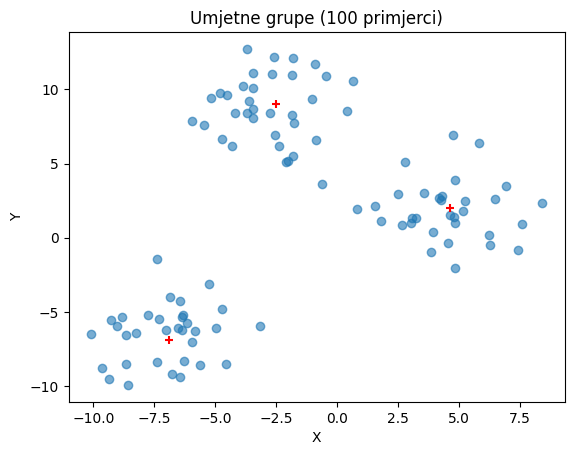

In [3]:
plt.scatter(X[:,0], X[:,1], alpha=0.6)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Umjetne grupe (%s primjerci)" % total_samples)

for c in centers:
    plt.scatter(c[0], c[1], marker="+", color="red")

c:\Users\Luka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Luka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Luka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Luka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

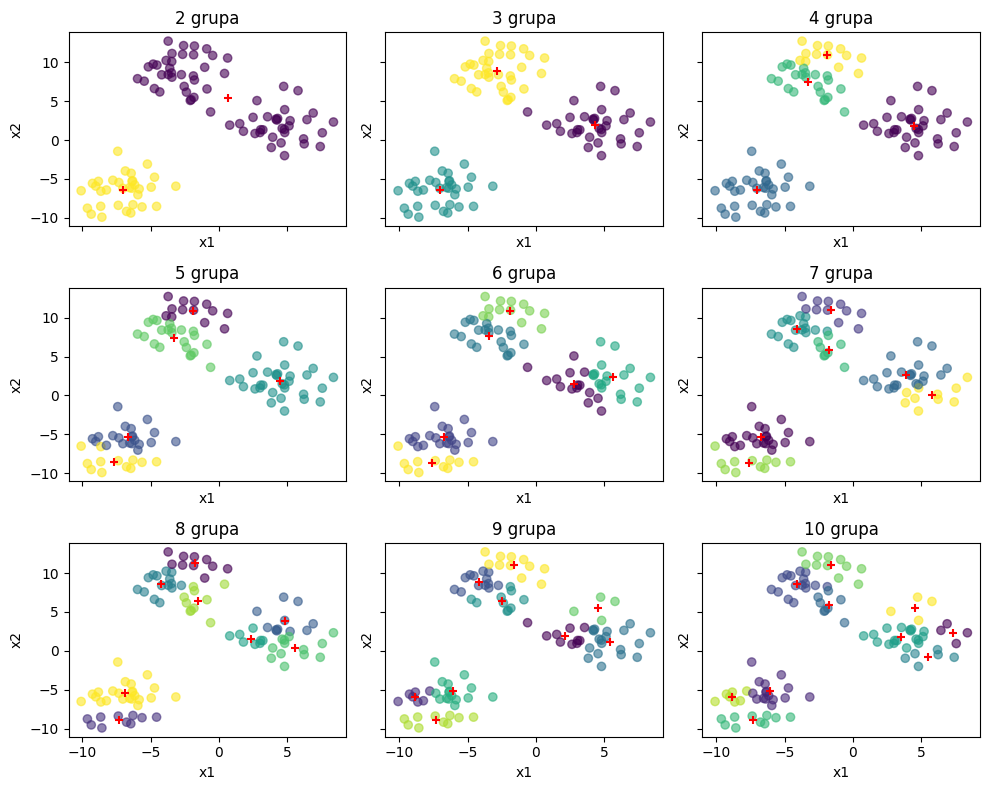

In [4]:
MIN_CLUSTERS = 2
MAX_CLUSTERS = 10

COLUMNS = 3
ROWS = math.ceil((MAX_CLUSTERS-MIN_CLUSTERS)/COLUMNS)
fig, axs = plt.subplots(ROWS, COLUMNS, figsize=(10,8), sharey=True, sharex=True)

for n_clusters in range(MIN_CLUSTERS, MAX_CLUSTERS+1):
    current_column = (n_clusters-MIN_CLUSTERS)%COLUMNS
    current_row = (n_clusters-MIN_CLUSTERS)//COLUMNS
    ax = axs[current_row, current_column]
    kmean = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    ax.scatter(X[:,0], X[:,1], c=kmean.labels_, alpha=0.6)
    ax.set_title("%s grupa"%n_clusters)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    for c in kmean.cluster_centers_:
        ax.scatter(c[0], c[1], marker="+", color="red")

plt.tight_layout()

c:\Users\Luka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Luka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Luka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Luka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

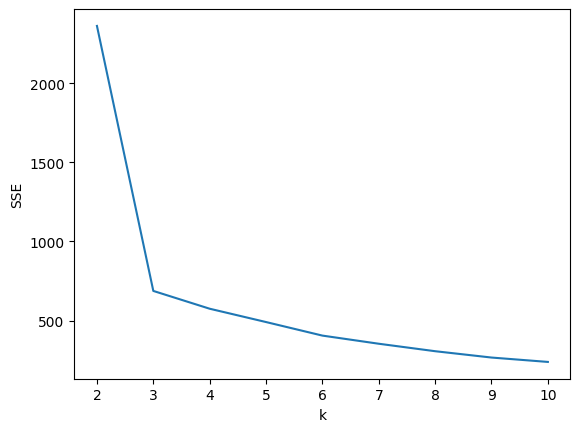

In [5]:
def plot_sse(features_X, start=2, end=11):
    sse = []
    for k in range(start, end):
        # Assign the labels to the clusters
        kmeans = KMeans(n_clusters=k, random_state=10).fit(features_X)
        sse.append({"k": k, "sse": kmeans.inertia_})

    sse = pd.DataFrame(sse)
    # Plot the data
    plt.plot(sse.k, sse.sse)
    plt.xlabel("k")
    plt.ylabel("SSE")
    
plot_sse(X)

c:\Users\Luka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Luka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Luka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Luka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

Text(0, 0.5, 'Silhouette score')

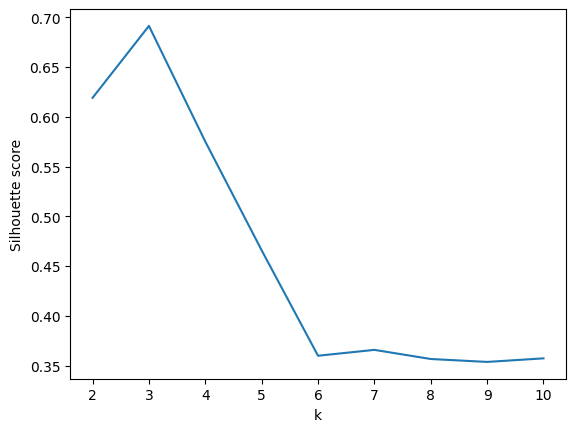

In [6]:
silhouettes = []

# Try multiple k
for k in range(2, 11):
    # Cluster the data and assigne the labels
    labels = KMeans(n_clusters=k, random_state=10).fit_predict(X)
    # Get the Silhouette score
    score = silhouette_score(X, labels)
    silhouettes.append({"k": k, "score": score})
    
# Convert to dataframe
silhouettes = pd.DataFrame(silhouettes)

# Plot the data
plt.plot(silhouettes.k, silhouettes.score)
plt.xlabel("k")
plt.ylabel("Silhouette score")

### **Algoritam DBSCAN**

Algoritam $k$-means najpoznatiji je predstavnik algoritama grupiranja, no nije bez mana. Uz već spomenutu potrebu za podešavanjem parametra $k$, ovaj algoritam je osjetljiv na šum u podacima te može formirati grupe samo sferičnih oblika u ulaznom prostoru. Još jedan poznati algoritam grupiranja jest algoritam DBSCAN (*Density-based spatial clustering of applications with noise*). Motivacija iza načina rada ovog algoritma proizlazi iz nedostataka algoritma $k$-means. Naime, algoritam $k$-means favorizira sferične oblike grupa te ima poteškoća sa sastavljanjem grupa koje imaju drugačije oblike u ulaznom prostoru. Algoritam DBSCAN izvodi grupiranje na temelju gustoće i prati oblik gustih susjedstava točaka. Da bi objasnili način rada algoritma, potrebno je uvesti terminologiju pomoću nekoliko definicija:

1.  **Okolinu** neke točke određuje skup točaka udaljenih manje od $ϵ$ od promatrane točke.

2.  Najmanji broj točaka (*minPts*) označava koliko se točaka mora nalaziti unutar okoline promatrane točke kako bi ista mogla biti **središte** grupe.

3.  **Granična točka** (engl. *border*) je svaka točka koja je u okolini središnje točke. 

4. Točka $p$ je **izravno dohvatljiva** (engl. *directly density-reachable*) iz točke $q$, ako se $p$ nalazi u okolini točke $q$ i ako je $q$ središnja točka. 

5. Točka $p$ je **dohvatljiva** (engl. *density-reachable*) iz točke $q$, ako postoji put preko točaka $t_1$, $t_2$, $\dots$, $t_n$, gdje je $t_1=q$ i $t_n=p$, takvih da je $t_{i+1}$ izravno dohvatljiva iz $t_i$. 

6. Točka $p$ je **povezana** (engl. *density-connected*) s točkom $q$, ako postoji točka $t$ takva da su $p$ i $q$ dohvatljive iz $t$. 

7. Nedohvatljive točke označavaju se kao šum (engl. *noise*) i ne grupiraju se.

#### **Način rada algoritma**

Algoritam DBSCAN zahtijeva dva parametra: veličinu okoline ($\epsilon$) i najmanji broj točaka za stvaranje grupe (*minPts*). Algoritam provodi sljedeće korake:

1.  Iz skupa neposjećenih točaka slučajno odaberi jednu.

2.  Ako okolina odabrane točke sadrži dovoljan broj točaka ($\geq$ minPts), označi ju kao središte i stvori grupu. Inače ju označi kao šum (moguće je da će u sljedećim koracima algoritma točka biti svrstana u neku od grupa). 

3.  U grupu dodaj okoline novododanih točaka koje sadrže više od najmanjeg broja točaka ($\geq$ minPts). 

4.  Ponovi prethodni korak dok postoje takve okoline.

5.  Ponovi prvi korak dok sve točke nisu označene kao posjećene.


Slika ilustrira navedene pojmove. Točka B dohvatljiva je iz C jer postoji put crvenih točaka koji zadovoljava navedeni uvjet. Zadani najmanji broj točaka je tri pa točka A zadovoljava uvjet da postane središte. Točka N nije dohvatljiva iz niti jedne jezgre te ne pripada niti jednoj grupi.


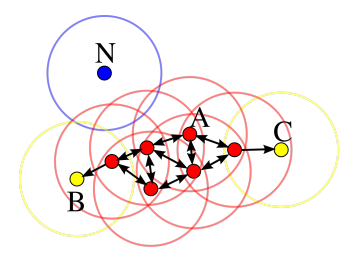

Algoritam DBSCAN za neke skupove podataka pronalazi bolje grupe nego algoritam $k$-means. Razlog tomu je što ovaj algoritam nije osjetljiv na šum kao $k$-means. Uobičajeno pronalazi grupe različitih veličina i različitih oblika, što nije često slučaj kod algoritma $k$-means. Kao parametre nije potrebno odrediti broj grupa, nego se zadaju veličina okoline i najmanji broj točaka u grupi.

S druge strane, vrijednosti veličine okoline i najmanjeg broja točaka u grupi teško je odrediti. Lošim odabirom ovih parametara, algoritam DBSCAN ima loše performanse. Te parametre u pravilu određuju domenski stručnjaci koji razumiju sadržaj skupa podataka. Postoje i pretpostavljene vrijednosti koje se u praksi mogu pokazati dobrim izborom. 

Algoritam DBSCAN može se vrlo jednostavno izvesti u programskom jeziku Python.

Text(0, 0.5, 'x2')

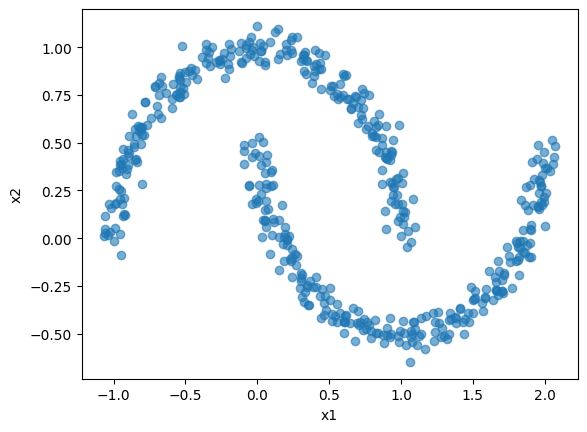

In [7]:
X_moons, _ = make_moons(500, noise=0.05, random_state=0)

plt.scatter(X_moons[:,0], X_moons[:,1], alpha=0.6)
plt.xlabel("x1")
plt.ylabel("x2")

c:\Users\Luka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


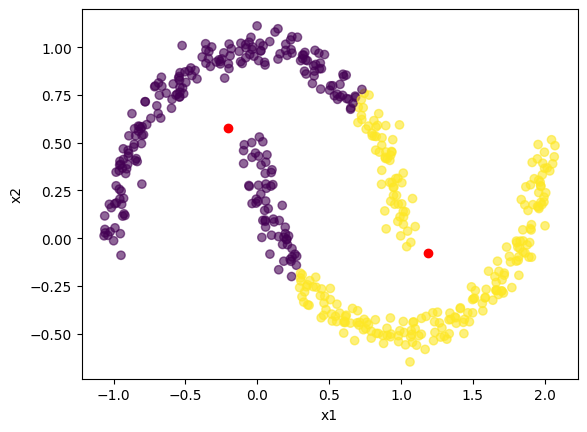

In [8]:
kmean = KMeans(n_clusters=2, random_state=0).fit(X_moons)
plt.scatter(X_moons[:,0], X_moons[:,1], c=kmean.labels_, alpha=0.6)
plt.xlabel("x1")
plt.ylabel("x2")

for c in kmean.cluster_centers_:
    plt.scatter(c[0], c[1], marker="o", color="red")

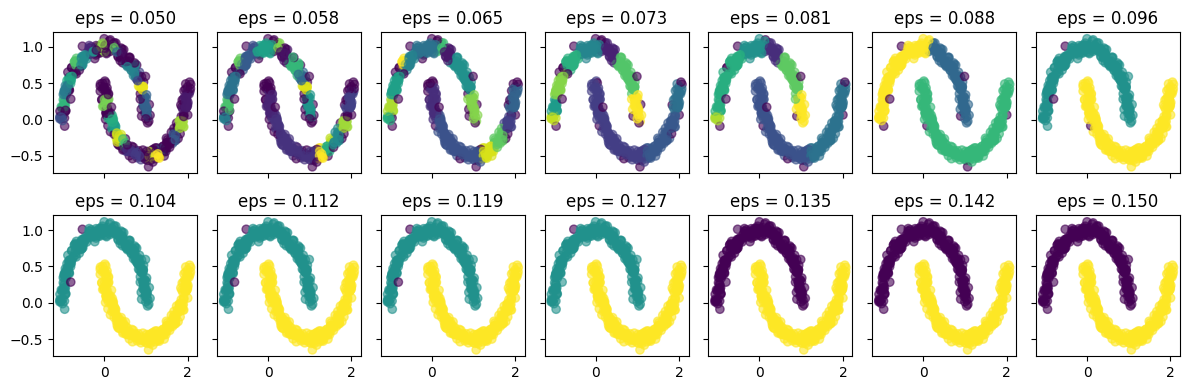

In [9]:
# Lista epsilon vrijednosti
eps_list = np.linspace(0.05, 0.15, 14)

COLUMNS = 7
ROWS = math.ceil(len(eps_list)/COLUMNS)

fig, axs = plt.subplots(ROWS, COLUMNS, figsize=(12, 4), sharey=True, sharex=True)

for i in range(0, len(eps_list)):
    eps = eps_list[i]
    
    current_column = i%COLUMNS
    current_row = i//COLUMNS
    
    ax = axs[current_row, current_column]
    labels = DBSCAN(eps=eps).fit_predict(X_moons)
    ax.scatter(X_moons[:,0], X_moons[:,1], c=labels, alpha=0.6)
    ax.set_title("eps = {:.3f}".format(eps))
    
plt.tight_layout()

## **Pristranost kod grupiranja**

Grupiranje se koristi više nego što bi se trebalo koristiti jer ljudi pretpostavljaju da temeljna domena ima diskretne klase u sebi. Ovo potencijalno proizlazi iz ljudske prirode za grupiranjem osoba po tipu osobnosti i drugim obilježjima. 

Ipak, kod stvarnih skupova podataka kojima tek treba dodijeliti oznake, one su često kontinuirane vrijednosti. Kod takvih skupova podataka češće treba primijeniti algoritme nenadziranog strojnog učenja za **smanjenje dimenzionalnosti**.


# **Literatura**


---

[1] Materijali za predmet Applied Data Analysis (ADA) na EPFL

[2] McKinney, W., 2012. *Python for data analysis*. O'Reilly Media, Inc.

[3] Materijali za predmet Strojno učenje na FER (https://strojnoucenje.takelab.fer.hr/)

[4] Chire. Dbscan-illustration. https://commons.wikimedia.org/wiki/File:
DBSCAN-Illustration.svg, 2011.